In [31]:
# Task 3: Heart Disease Prediction

## Problem Statement
"""
The goal of this task is to build a machine learning model that predicts whether a person
is at risk of heart disease based on clinical and demographic features.

## Objectives
- Load and clean the Heart Disease UCI dataset.
- Perform Exploratory Data Analysis (EDA) to understand trends and feature relationships.
- Train a classification model (Logistic Regression) to predict heart disease presence.
- Evaluate the model using:
  - Accuracy
  - Confusion matrix
  - ROC curve and ROC-AUC score
- Analyze which features are most important for prediction.

This task demonstrates binary classification and model evaluation on a real medical dataset."""

'\nThe goal of this task is to build a machine learning model that predicts whether a person\nis at risk of heart disease based on clinical and demographic features.\n\n## Objectives\n- Load and clean the Heart Disease UCI dataset.\n- Perform Exploratory Data Analysis (EDA) to understand trends and feature relationships.\n- Train a classification model (Logistic Regression) to predict heart disease presence.\n- Evaluate the model using:\n  - Accuracy\n  - Confusion matrix\n  - ROC curve and ROC-AUC score\n- Analyze which features are most important for prediction.\n\nThis task demonstrates binary classification and model evaluation on a real medical dataset.'

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve
)

sns.set(style="whitegrid")

# Load dataset (ensure heart.csv is in the same folder)
df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [34]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [35]:
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (303, 14)


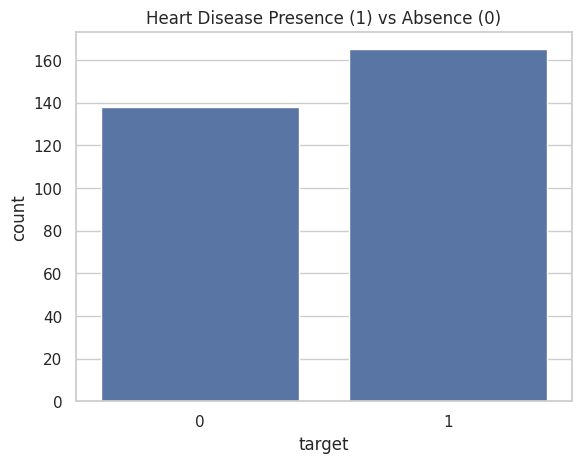

In [36]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

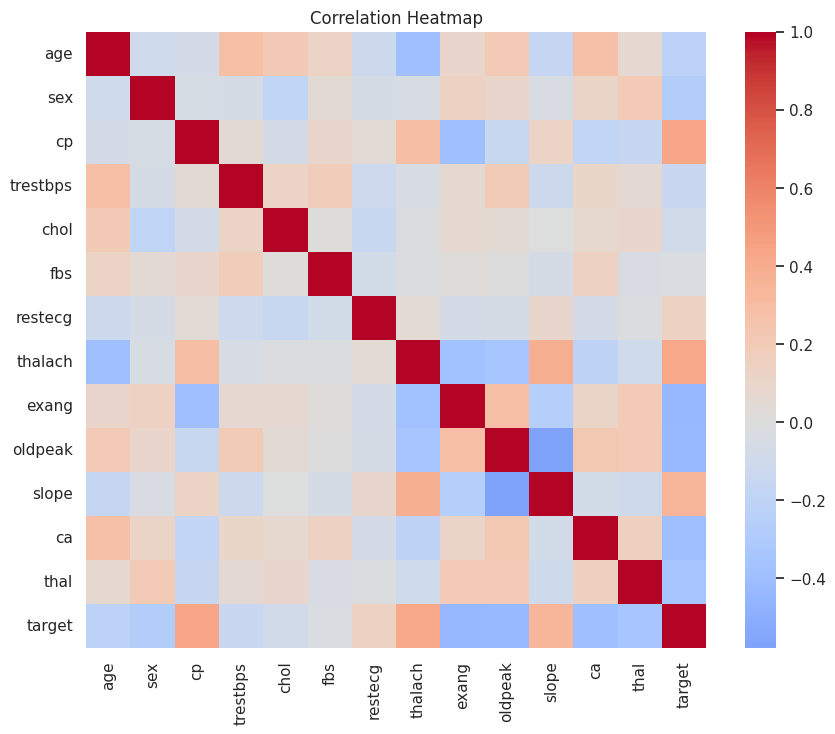

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

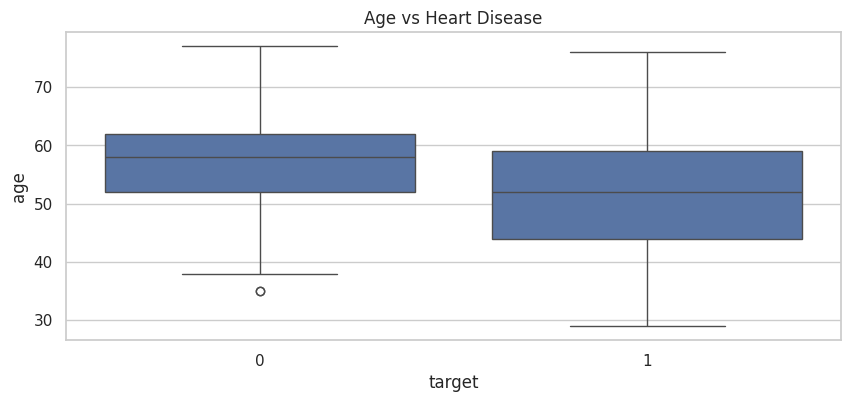

In [38]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Heart Disease")
plt.show()

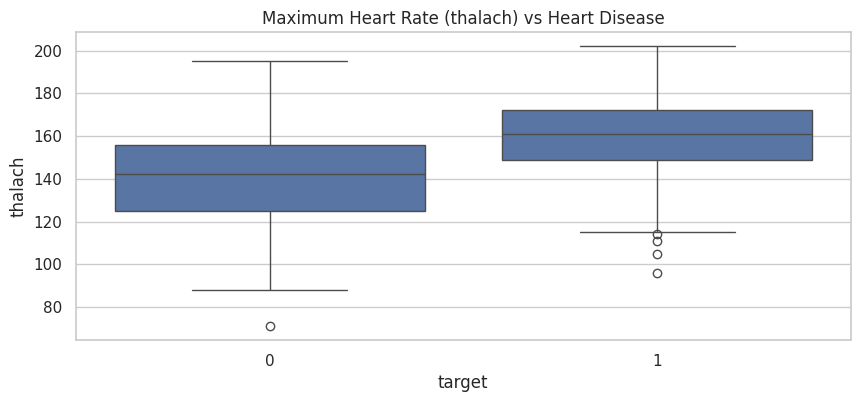

In [39]:
plt.figure(figsize=(10, 4))
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Maximum Heart Rate (thalach) vs Heart Disease")
plt.show()

In [40]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [42]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Accuracy: 0.803
ROC-AUC: 0.869


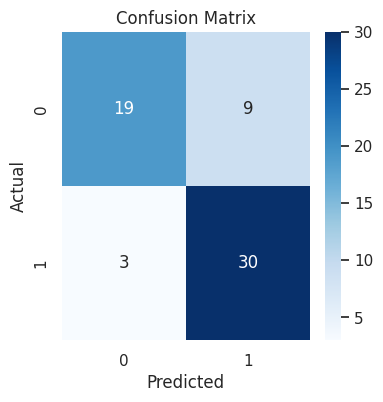

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

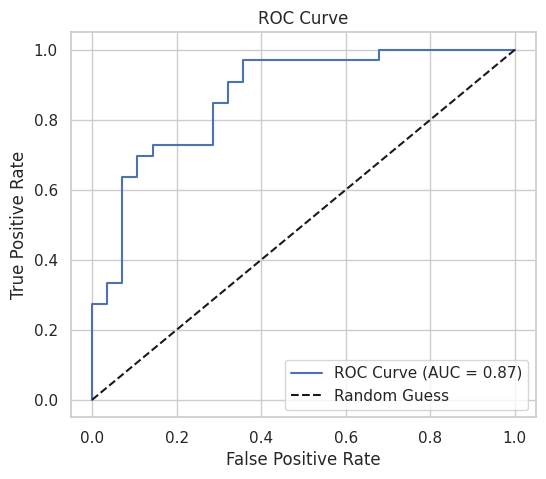

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [45]:
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": log_reg.coef_[0]
}).sort_values(by="coefficient", ascending=False)

feature_importance

,feature,coefficient
2,cp,0.937735
7,thalach,0.539629
10,slope,0.307867
6,restecg,0.235471
0,age,0.017736
5,fbs,-0.063649
3,trestbps,-0.211437
4,chol,-0.459210
8,exang,-0.475883
11,ca,-0.559203


/tmp/ipython-input-2322474200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


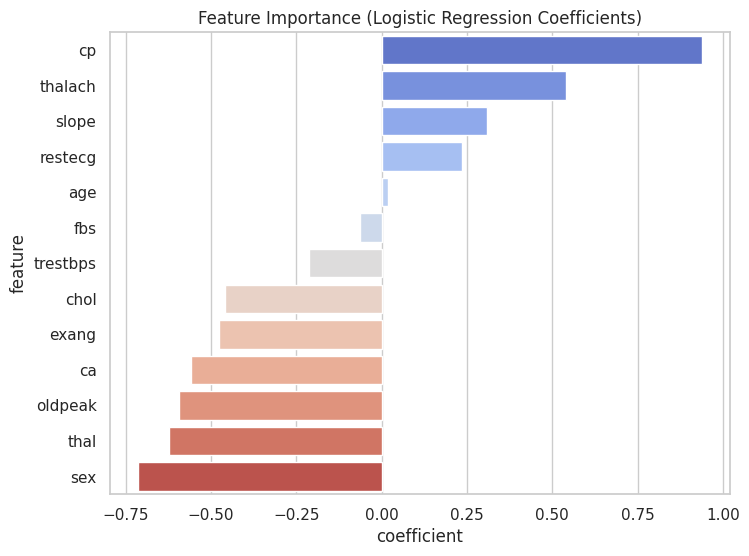

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=feature_importance,
    x="coefficient",
    y="feature",
    palette="coolwarm"
)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [47]:
## Conclusion and Insights

"""
- The dataset contains clinical and demographic features such as age, sex, chest pain type,
  resting blood pressure, cholesterol levels, maximum heart rate, and more, along with a
  binary target variable indicating heart disease presence.
- After loading and checking the data, there were no (or very few) missing values. Any
  missing values were handled by dropping the corresponding rows.
- EDA showed:
  - A reasonable balance between positive and negative heart disease cases.
  - Some features, such as chest pain type, maximum heart rate (`thalach`), and ST depression
    (`oldpeak`), appear correlated with heart disease outcomes.

- The Logistic Regression model achieved:
  - Accuracy around the test set (see printed value above).
  - ROC-AUC score indicating reasonably good discrimination between positive and negative cases.

- Feature importance analysis (coefficients) suggests that certain factors
  (e.g., higher `thalach`, certain chest pain types, ST depression) significantly influence
  the predicted risk of heart disease.

- Limitations:
  - Logistic Regression is a linear model and may not capture complex nonlinear patterns.
  - The dataset size is relatively small, so results may not generalize perfectly to all
    populations.

Overall, this model provides a basic but interpretable way to estimate heart disease risk
using structured medical data."""

'\n- The dataset contains clinical and demographic features such as age, sex, chest pain type,\n  resting blood pressure, cholesterol levels, maximum heart rate, and more, along with a\n  binary target variable indicating heart disease presence.\n- After loading and checking the data, there were no (or very few) missing values. Any\n  missing values were handled by dropping the corresponding rows.\n- EDA showed:\n  - A reasonable balance between positive and negative heart disease cases.\n  - Some features, such as chest pain type, maximum heart rate (`thalach`), and ST depression\n    (`oldpeak`), appear correlated with heart disease outcomes.\n\n- The Logistic Regression model achieved:\n  - Accuracy around the test set (see printed value above).\n  - ROC-AUC score indicating reasonably good discrimination between positive and negative cases.\n\n- Feature importance analysis (coefficients) suggests that certain factors\n  (e.g., higher `thalach`, certain chest pain types, ST depressi